In [1]:
import tessreduce as tr 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [55]:
sn = tr.sn_lookup('sn2020ghq')

|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|       23 | True     |                  0 |
|       24 | False    |                  8 |
|       50 | False    |                717 |


made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


<IPython.core.display.Javascript object>


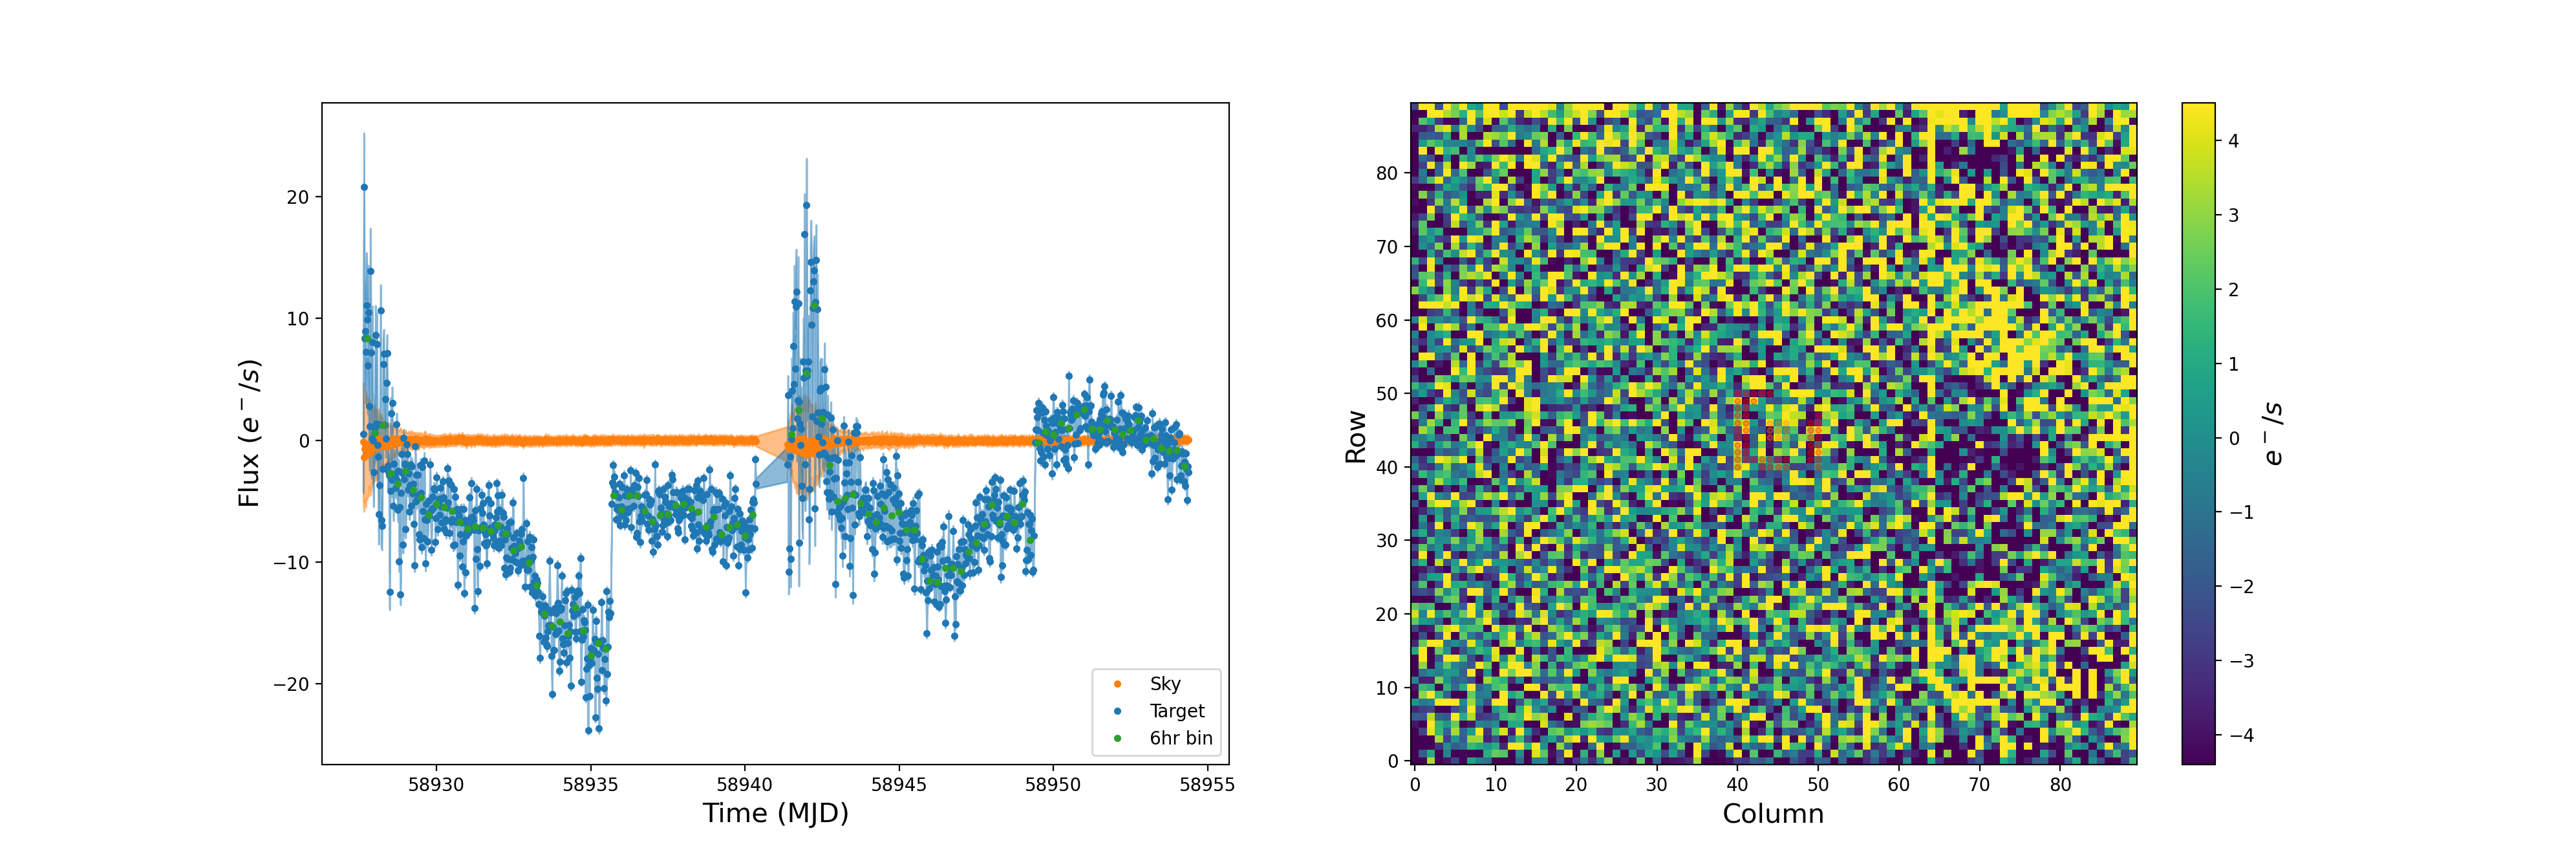

In [2]:
# reduce the data 
t = tr.tessreduce(obs_list=sn,reduce=True)

In [16]:
# make a duplicate to mess with
t2 = tr.deepcopy(t)

In [21]:
# make a seed transient to see how that is influenced 
seed = np.zeros(len(t.flux))
seed[800:] = 10

In [38]:
# make a new array controled for only shifts.
# Shift the reference image according to the 
# original shifts, and add a basic fake signal.

shifted = tr.deepcopy(t.flux)
for i in range(len(t.flux)):
    s = tr.deepcopy(t.ref)
    s[45,45] += seed[i]
    shifted[i] = tr.shift(s,-t.shift[i])

<IPython.core.display.Javascript object>


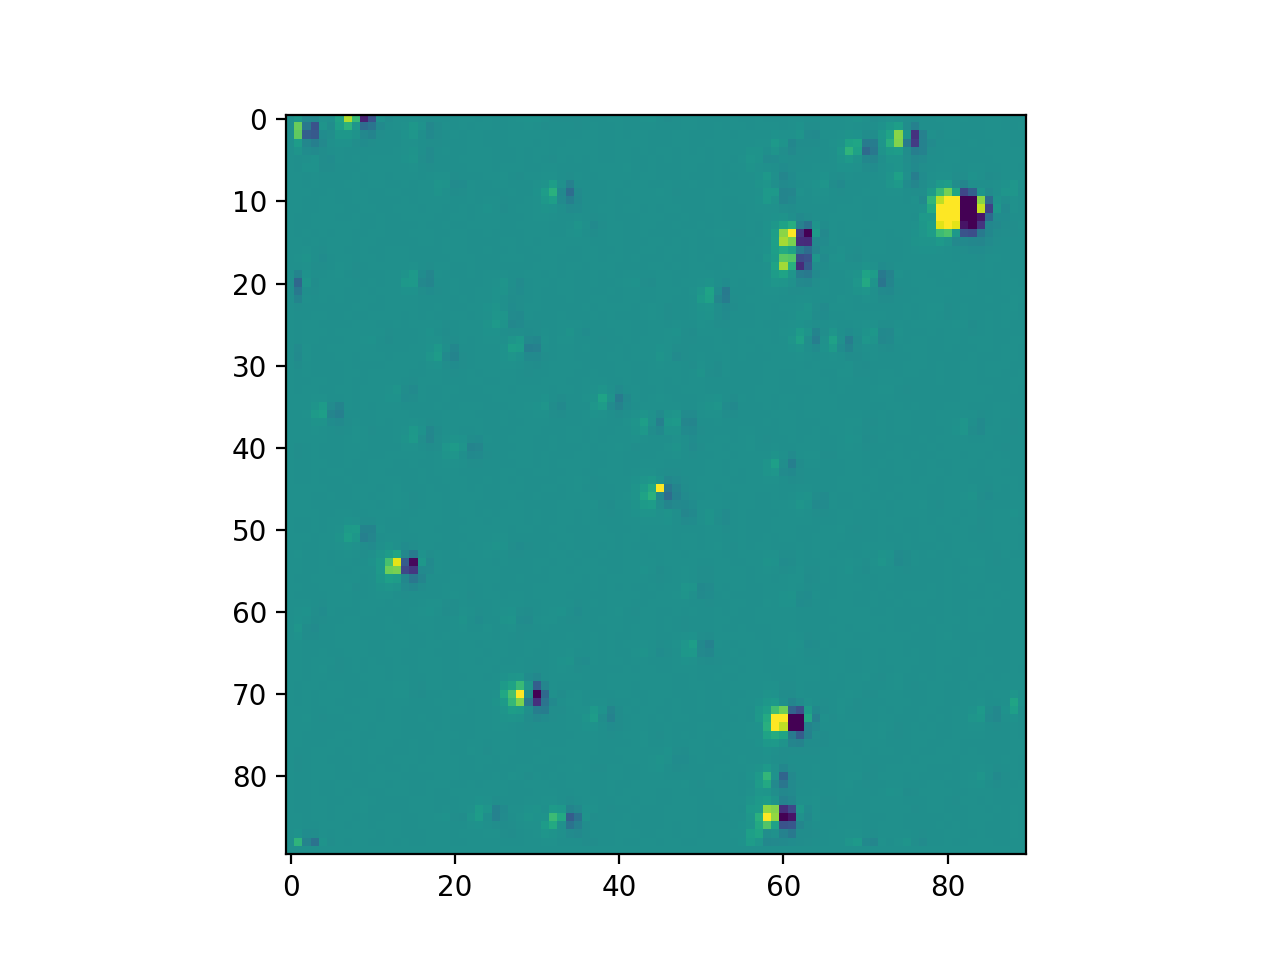

In [49]:
# looks like the images have been shifted
plt.figure()
plt.imshow(shifted[900]-shifted[101],vmin=-10,vmax=10)

<IPython.core.display.Javascript object>


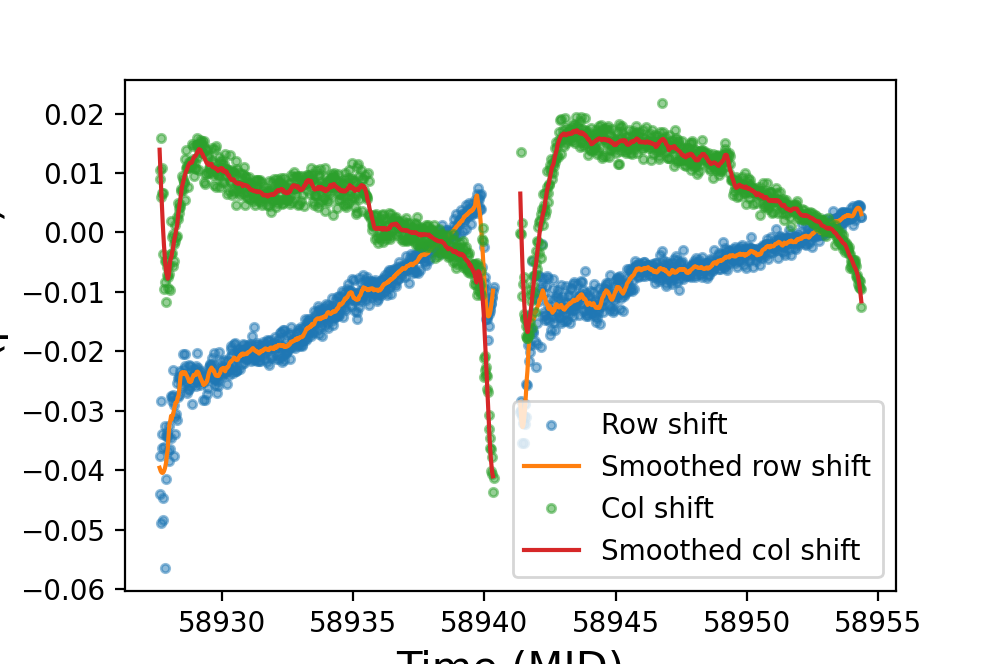

In [50]:
# asign the new controlled array and calculate the shift
t2.flux = shifted
t2.centroids_DAO(plot=True)

<IPython.core.display.Javascript object>


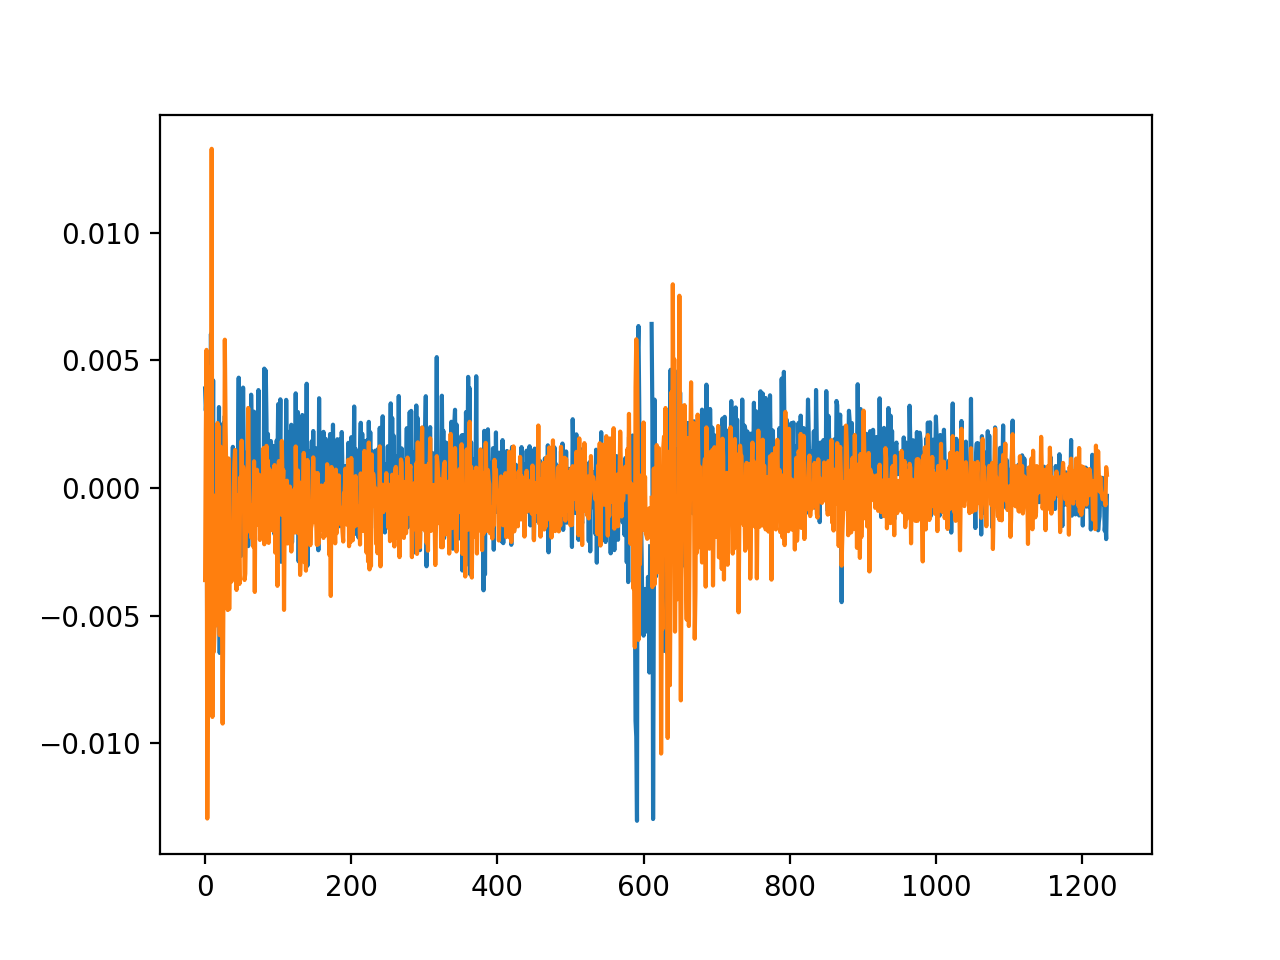

In [43]:
# How does the shift compare? works pretty well
plt.figure()
plt.plot(t2.shift - t.shift)

In [52]:
# shift images according to the calculated shifts 
t2.shift_images()

<IPython.core.display.Javascript object>


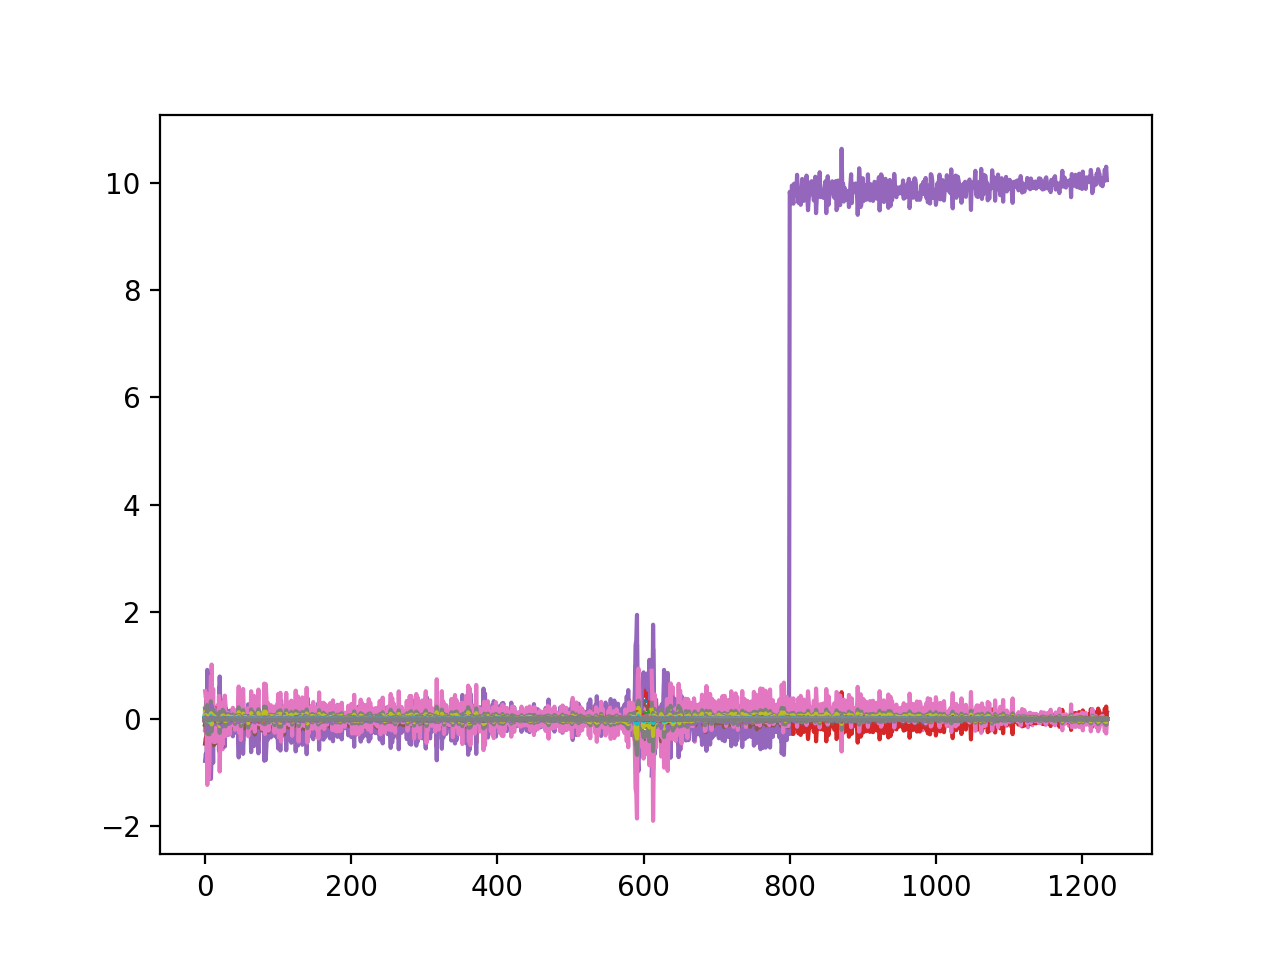

In [54]:
# plot the lightcurves of pixels
plt.figure()
plt.plot(t2.flux[:,1:-1,45]-t2.ref[1:-1,45]);

Looks like the controlled case has no jumps, so this is the jumps are likely not an alignment problem. That leaves a changing PSF/PRF as the likely problem. Not sure how to solve this...